## Dependencias

In [ ]:
%pip install -r requirements.txt

In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly_resampler import FigureResampler
from tqdm.auto import tqdm

In [2]:
%cd src
from data import load_signals, load_annotations, annotation_to_30s_labels
%cd ..

c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear\src
c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear


In [3]:
data_folder = "./data/"
os.listdir(data_folder)

['RECORDS',
 'RECORDS-v1',
 'sc-aux',
 'SC-subjects.xls',
 'SHA256SUMS.txt',
 'sleep-cassette',
 'sleep-telemetry',
 'ST-subjects.xls']

In [4]:
os.listdir(data_folder + "/sleep-telemetry")[:10]

['ST7011J0-PSG.edf',
 'ST7011JP-Hypnogram.edf',
 'ST7012J0-PSG.edf',
 'ST7012JP-Hypnogram.edf',
 'ST7021J0-PSG.edf',
 'ST7021JM-Hypnogram.edf',
 'ST7022J0-PSG.edf',
 'ST7022JM-Hypnogram.edf',
 'ST7041J0-PSG.edf',
 'ST7041JO-Hypnogram.edf']

## Armamos el Dataframe con los archivos a analizar

In [5]:
dfs = []
sub_folder = "/sleep-telemetry"
sorted_files = sorted(os.listdir(data_folder + sub_folder))
psg_hypnogram_files = [(p, h) for p, h in zip(sorted_files[::2], sorted_files[1:][::2])]
df_files = pd.DataFrame(psg_hypnogram_files, columns=["psg_file", "label_file"])
df_files["subfolder"] = sub_folder

# Because for the SC study patients were monitored for 2 consecutive nights
df_files["patient_id"] = df_files.psg_file.apply(lambda f: f[:5])
df_files

,psg_file,label_file,subfolder,patient_id
0,ST7011J0-PSG.edf,ST7011JP-Hypnogram.edf,/sleep-telemetry,ST701
1,ST7012J0-PSG.edf,ST7012JP-Hypnogram.edf,/sleep-telemetry,ST701
2,ST7021J0-PSG.edf,ST7021JM-Hypnogram.edf,/sleep-telemetry,ST702
3,ST7022J0-PSG.edf,ST7022JM-Hypnogram.edf,/sleep-telemetry,ST702
4,ST7041J0-PSG.edf,ST7041JO-Hypnogram.edf,/sleep-telemetry,ST704
5,ST7042J0-PSG.edf,ST7042JO-Hypnogram.edf,/sleep-telemetry,ST704
6,ST7051J0-PSG.edf,ST7051JA-Hypnogram.edf,/sleep-telemetry,ST705
7,ST7052J0-PSG.edf,ST7052JA-Hypnogram.edf,/sleep-telemetry,ST705
8,ST7061J0-PSG.edf,ST7061JR-Hypnogram.edf,/sleep-telemetry,ST706
9,ST7062J0-PSG.edf,ST7062JR-Hypnogram.edf,/sleep-telemetry,ST706


### Procesamos las señales de los archivos pacientes del paper

In [6]:
annotations = load_annotations(
    data_folder + df_files.iloc[0].subfolder + "/" + df_files.iloc[0].label_file,
    data_folder + df_files.iloc[0].subfolder + "/" + df_files.iloc[0].psg_file,
)

In [7]:
signal_dict = {}

for idx in range(len(df_files)):
    try:
        sig, freq = load_signals(
            data_folder + df_files.iloc[idx].subfolder + "/" + df_files.iloc[idx].psg_file,
            only_info=True,
        )
        for s, f in zip(sig, freq):
            if (s, f) in signal_dict.keys():
                signal_dict[(s, f)].append(idx)
            else:
                signal_dict[(s, f)] = [idx]
    except Exception as e:
        print(f"Error al procesar el archivo {df_files.iloc[idx].psg_file}: {e}")

# Muestra (sig, freq) #grabaciones
[(k, len(v)) for k, v in signal_dict.items()]

[(('EEG Fpz-Cz', 100.0), 44),
 (('EEG Pz-Oz', 100.0), 44),
 (('EOG horizontal', 100.0), 44),
 (('EMG submental', 100.0), 44),
 (('Marker', 10.0), 44)]

In [8]:
common_signals = [
    "EEG Fpz-Cz",
    "EEG Pz-Oz",
    "EOG horizontal",  # All have the same sampling rate (100 Hz)
    "EMG submental",  # Different sampling rate: 100 Hz for telemetry & 1 Hz for cassette
]

In [9]:
cats = [
    "Sleep stage ?",
    "Movement time",
    "Sleep stage W",
    "Sleep stage 1",
    "Sleep stage 2",
    "Sleep stage 3",
    "Sleep stage 4",
    "Sleep stage R",
][::-1]

### Extraemos las features

In [11]:
# Create the collection of tsfresh features to extract
tsfresh_settings = {
    "fft_aggregated": [
        {"aggtype": "centroid"},
        {"aggtype": "variance"},
        {"aggtype": "skew"},
        {"aggtype": "kurtosis"},
    ],
    "fourier_entropy": [
        {"bins": 2},
        {"bins": 3},
        {"bins": 5},
        {"bins": 10},
        {"bins": 30},
        {"bins": 60},
        {"bins": 100},
    ],
    "binned_entropy": [
        {"max_bins": 5},
        {"max_bins": 10},
        {"max_bins": 30},
        {"max_bins": 60},
    ],
}

tsfresh_settings

{'fft_aggregated': [{'aggtype': 'centroid'},
  {'aggtype': 'variance'},
  {'aggtype': 'skew'},
  {'aggtype': 'kurtosis'}],
 'fourier_entropy': [{'bins': 2},
  {'bins': 3},
  {'bins': 5},
  {'bins': 10},
  {'bins': 30},
  {'bins': 60},
  {'bins': 100}],
 'binned_entropy': [{'max_bins': 5},
  {'max_bins': 10},
  {'max_bins': 30},
  {'max_bins': 60}]}

In [12]:
import antropy as ant
import scipy.stats as ss
from yasa import bandpower
import scipy.stats as ss
from tsflex.features import (
    FeatureCollection,
    FuncWrapper,
    MultipleFeatureDescriptors,
    FuncWrapper,
)
from tsflex.features.integrations import tsfresh_settings_wrapper


def wrapped_higuchi_fd(x):
    x = np.array(x, dtype="float64")
    return ant.higuchi_fd(x)


bands = [
    (0.4, 1, "sdelta"),
    (1, 4, "fdelta"),
    (4, 8, "theta"),
    (8, 12, "alpha"),
    (12, 16, "sigma"),
    (16, 30, "beta"),
]
bandpowers_ouputs = [b[2] for b in bands] + ["TotalAbsPow"]


def wrapped_bandpowers(x, sf, bands):
    return bandpower(x, sf=sf, bands=bands).values[0][:-2]


time_funcs = [
    np.std,
    ss.iqr,
    ss.skew,
    ss.kurtosis,
    ant.num_zerocross,
    FuncWrapper(
        ant.hjorth_params, output_names=["horth_mobility", "hjorth_complexity"]
    ),
    wrapped_higuchi_fd,
    ant.petrosian_fd,
    ant.perm_entropy,
] + tsfresh_settings_wrapper(tsfresh_settings)

freq_funcs = [
    FuncWrapper(wrapped_bandpowers, sf=100, bands=bands, output_names=bandpowers_ouputs)
]

time_feats = MultipleFeatureDescriptors(
    time_funcs,
    ["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal", "EMG submental"],
    windows=["30s", "60s", "90s"],
    strides="30s",
)
freq_feats = MultipleFeatureDescriptors(
    freq_funcs,
    ["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal"],
    windows=["30s", "60s", "90s"],
    strides="30s",
)

feature_collection = FeatureCollection([time_feats, freq_feats])

# Pipeline para todos los pacientes


In [13]:
from scipy.signal import butter, lfilter
from tsflex.processing import SeriesPipeline, SeriesProcessor

def butter_bandpass_filter(sig, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    y = lfilter(b, a, sig)
    return y

eeg_bandpass = SeriesProcessor(
    function=butter_bandpass_filter,
    series_names=["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal"],
    lowcut=0.4,
    highcut=30,
    fs=100,
)

process_pipe = SeriesPipeline(
    [
        eeg_bandpass,
    ]
)

process_pipe

[
	butter_bandpass_filter {'lowcut': 0.4, 'highcut': 30, 'fs': 100} :  ('EEG Fpz-Cz',) ('EEG Pz-Oz',) ('EOG horizontal',)
]

In [ ]:
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in scalar divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.")

df_feats = []
counter = 0
df_feats_total = pd.DataFrame()

for sub_folder, psg_file, hypnogram_file in tqdm(zip(df_files.subfolder, df_files.psg_file, df_files.label_file)):
    file_folder = data_folder + sub_folder + "/"
    print(str(counter) + ": " + file_folder + psg_file)

    # Load the data, process the data and extract features
    data = load_signals(file_folder + psg_file)
    data_processed = process_pipe.process(data)
    df_feat = feature_collection.calculate(data_processed, return_df=True, window_idx="begin").astype("float32")

    # Add the labels (and reduce features to only data for which we have labels)
    annotations = load_annotations(file_folder + hypnogram_file, file_folder + psg_file)
    annotations = annotation_to_30s_labels(annotations)
    df_feat = df_feat.merge(annotations, left_index=True, right_index=True)

    # Add the file name & folder
    df_feat["psg_file"] = psg_file
    df_feat["patient_id"] = psg_file[:5]

    # Collect the dataframes
    df_feats += [df_feat]

    # Increment counter
    counter += 1

df_feats = pd.concat(df_feats)
df_feats.rename(columns={"description": "label"}, inplace=True)
df_feats.to_parquet("./features/sleep-edf_telemetry_features.parquet")

In [14]:
df_feats = pd.read_parquet("./features/sleep-edf_telemetry_features.parquet")
df_feats.shape

(42839, 366)

In [15]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42839 entries, 1994-07-12 23:00:00 to 1994-09-16 07:44:00
Columns: 366 entries, EEG Fpz-Cz__TotalAbsPow__w=1m to patient_id
dtypes: float32(363), object(3)
memory usage: 60.6+ MB


In [16]:
df_feats["label"].value_counts()

label
Sleep stage 2    19851
Sleep stage R     8349
Sleep stage W     4488
Sleep stage 1     3653
Sleep stage 3     3398
Sleep stage 4     3017
Movement time       83
Name: count, dtype: int64

In [17]:
eeg_signals = [d for d in common_signals if "EEG" in d]
bands = ["alpha", "beta", "sdelta", "fdelta", "sigma", "theta"]
for eeg_sig in eeg_signals:
    eeg_bands = [
        c
        for c in df_feats.columns
        if c.startswith(eeg_sig) and c.split("__")[1] in bands
    ]
    windows = sorted(set(b.split("__")[-1] for b in eeg_bands))
    for window in windows:
        # Select the spectral powers
        delta = (
            df_feats["__".join([eeg_sig, "sdelta", window])]
            + df_feats["__".join([eeg_sig, "fdelta", window])]
        )
        fdelta_theta = (
            df_feats["__".join([eeg_sig, "fdelta", window])]
            + df_feats["__".join([eeg_sig, "theta", window])]
        )
        alpha = df_feats["__".join([eeg_sig, "alpha", window])]
        beta = df_feats["__".join([eeg_sig, "beta", window])]
        theta = df_feats["__".join([eeg_sig, "theta", window])]
        sigma = df_feats["__".join([eeg_sig, "sigma", window])]
        # Calculate the ratios
        df_feats["__".join([eeg_sig, "fdelta+theta", window])] = fdelta_theta.astype("float32")
        df_feats["__".join([eeg_sig, "alpha/theta", window])] = (alpha / theta).astype("float32")
        df_feats["__".join([eeg_sig, "delta/beta", window])] = (delta / beta).astype("float32")
        df_feats["__".join([eeg_sig, "delta/sigma", window])] = (delta / sigma).astype("float32")
        df_feats["__".join([eeg_sig, "delta/theta", window])] = (delta / theta).astype("float32")
df_feats.shape

(42839, 396)

In [18]:
import re
skip_cols = ["psg_file", "label", "patient_id"]
feat_cols = [c for c in df_feats.columns if c not in skip_cols]
pattern = re.compile(r'w=1m(?!\d)')

# Add the 30s features from the minute before and the minute after the epoch (= current sample of 30s) to the epoch
feats_30s = [f for f in df_feats.columns if "w=30s" in f]
feats_60s = [f for f in df_feats.columns if pattern.search(f)]
feats_90s = [f for f in df_feats.columns if "w=1m30s" in f]
print(len(feats_30s), len(feats_60s), len(feats_90s))
dfs = []
for psg_file in df_feats.psg_file.unique():
    sub_df = df_feats[df_feats.psg_file == psg_file]

    sub_df = sub_df.merge(
        sub_df[feats_90s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.drop(columns=feats_90s)

    sub_df = sub_df.merge(
        sub_df[feats_60s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )

    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(2).add_suffix("_shift=1m"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(-1).add_suffix("_shift=-30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(-2).add_suffix("_shift=-1m"),
        left_index=True,
        right_index=True,
    )
    dfs += [sub_df]
df_feats = pd.concat(dfs)
df_feats.shape

131 131 131


(42839, 1051)

In [19]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42839 entries, 1994-07-12 23:00:00 to 1994-09-16 07:44:00
Columns: 1051 entries, EEG Fpz-Cz__TotalAbsPow__w=1m to EEG Pz-Oz__delta/theta__w=30s_shift=-1m
dtypes: float32(1048), object(3)
memory usage: 172.6+ MB


In [20]:
# Postprocess labels
df_feats.loc[df_feats["label"] == "Sleep stage 4", "label"] = "Sleep stage 3"
df_feats = df_feats[df_feats["label"] != "Movement time"]
df_feats = df_feats[df_feats["label"] != "Sleep stage ?"]  # Label that is given when recording is done / end of the night

In [24]:
def get_repeat_length(val, arr):
    if arr[0] != val:
        return 0
    return np.where(arr != val)[0][0] + 1


dfs = []
for psg_file in df_feats["psg_file"].unique():
    sub_df = df_feats[df_feats.psg_file == psg_file]  # .sort_index()
    labels = sub_df["label"].values
    nb_wake_before_sleep = get_repeat_length("Sleep stage W", labels)
    nb_wake_after_sleep = get_repeat_length("Sleep stage W", labels[::-1])
    start_idx = max(0, nb_wake_before_sleep - 30 * 2)
    end_idx = min(-1, -nb_wake_after_sleep + 30 * 2)
    dfs.append(sub_df[start_idx:end_idx])
df_feats_trimmed_all = pd.concat(dfs)
del dfs

## Exploratory Data Analysis (EDA)

### Labels plots

<Axes: title={'center': 'Label distribution'}, xlabel='Label', ylabel='Number of samples'>

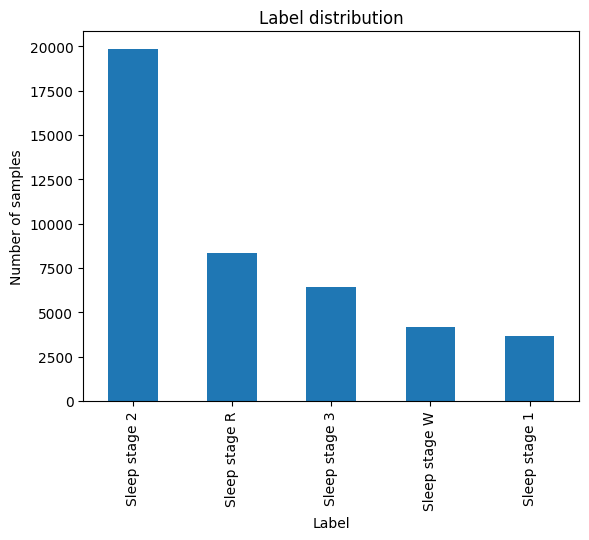

In [32]:
df_feats_trimmed_all["label"].value_counts().plot(kind="bar", title="Label distribution", xlabel="Label", ylabel="Number of samples")

### Space Visualization

In [27]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

feat_cols = [c for c in df_feats_trimmed_all.columns if c not in ["label", "psg_file", "patient_id"]]

#### PCA

(42436, 2)


c:\Users\ahmat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Sleep Stages Spatial Distribution with PCA')

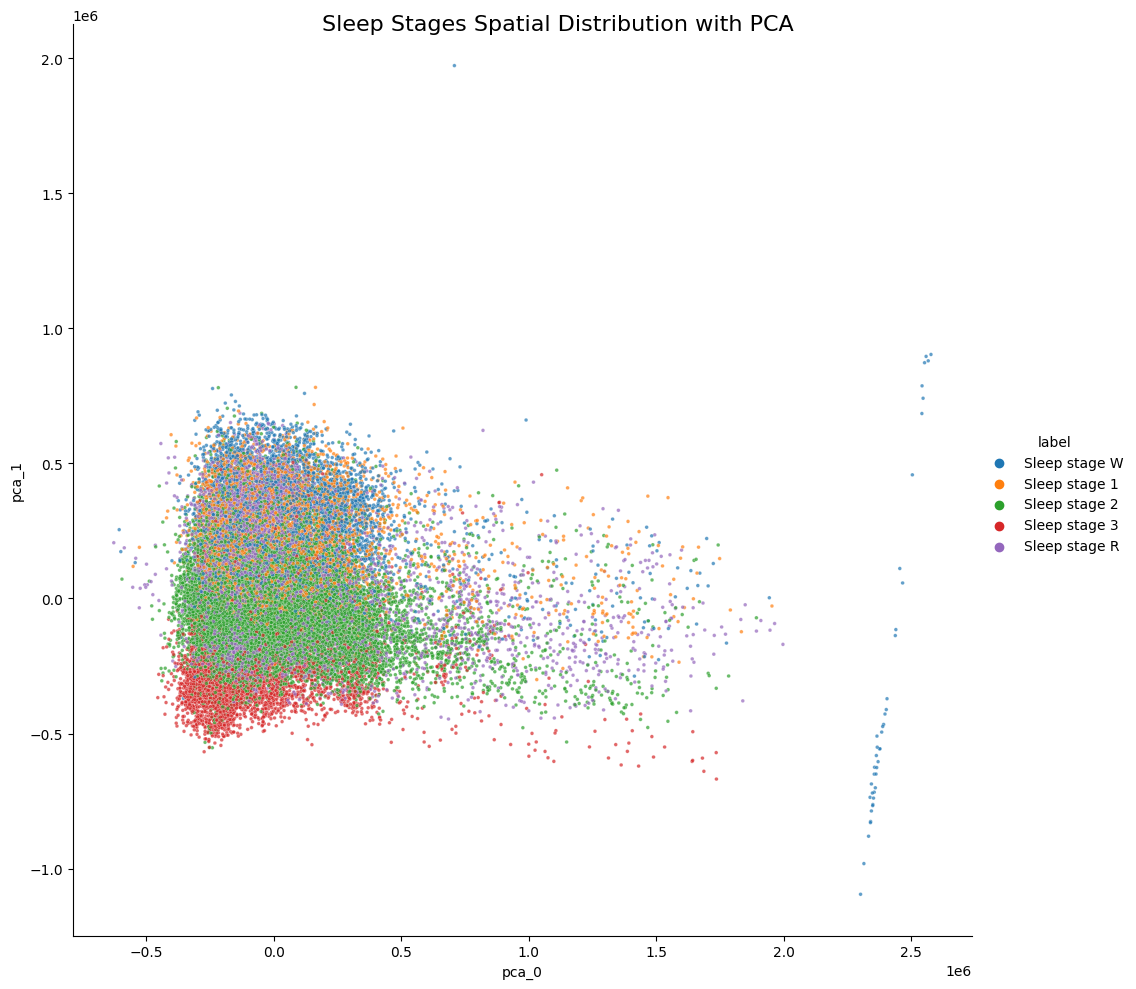

In [40]:
n_components = 2
pca = PCA(n_components)
pca_result = pca.fit_transform(SimpleImputer().fit_transform(df_feats_trimmed_all[feat_cols]))
print(pca_result.shape)

label_col = "label"
pca_result = pd.DataFrame(pca_result).add_prefix("pca_")
pca_result[label_col] = df_feats_trimmed_all[label_col].values

labels = ["Sleep stage W"] + [f"Sleep stage {i}" for i in range(1,4)] + ["Sleep stage R"] 
scatter_plot = sns.relplot(
                    data=pca_result,
                    x="pca_0",
                    y="pca_1",
                    hue=label_col,
                    hue_order=labels,
                    height=10,
                    kind="scatter",
                    s=7,
                    alpha=0.7
                )
scatter_plot.figure.suptitle("Sleep Stages Spatial Distribution with PCA", fontsize=16)

Variance explained by each component: [0.4476141  0.27221656 0.08444658 0.08305362 0.02008082 0.01996379
 0.01252106 0.00864851]


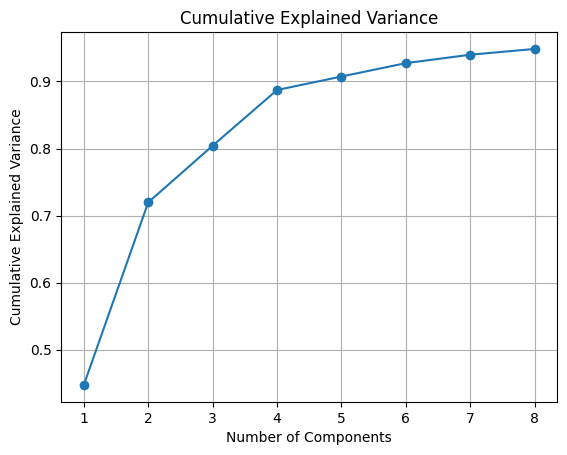

In [42]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(SimpleImputer().fit_transform(df_feats_trimmed_all[feat_cols]))
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, principal_components.shape[1] + 1)])

# Analisis de varianza
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance explained by each component:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

#### t-SNE

(30000, 2)


c:\Users\ahmat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Sleep Stages Spatial Distribution with t-SNE')

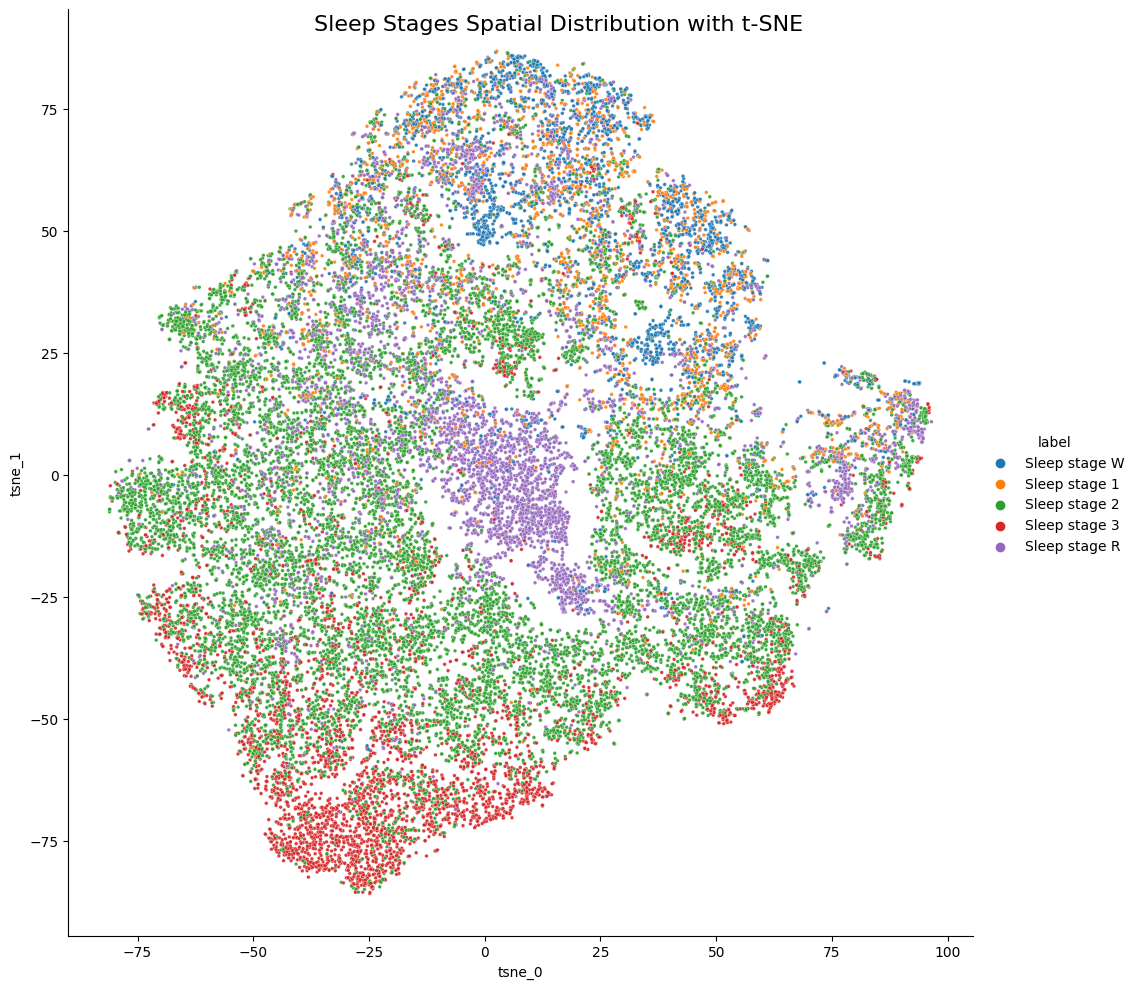

In [41]:
n_components = 2
sample = df_feats_trimmed_all.sample(30_000)  # sample 30k rows

tsne = TSNE(n_components, perplexity=50, n_jobs=30, init='pca', learning_rate='auto')
tsne_result = tsne.fit_transform(SimpleImputer().fit_transform(sample[feat_cols]))
print(tsne_result.shape)

label_col = "label"
tsne_result = pd.DataFrame(tsne_result).add_prefix("tsne_")
tsne_result[label_col] = sample[label_col].values

labels = ["Sleep stage W"] + [f"Sleep stage {i}" for i in range(1,4)] + ["Sleep stage R"] 
scatter_plot = sns.relplot(
                    data=tsne_result,
                    x="tsne_0",
                    y="tsne_1",
                    hue=label_col,
                    hue_order=labels,
                    height=10,
                    kind="scatter",
                    s=7,
                    alpha=0.9
                )
scatter_plot.figure.suptitle("Sleep Stages Spatial Distribution with t-SNE", fontsize=16)